#### This Notebook is the sample Demo setup for working with DakkoAI Client Library

In [1]:

# Import dakko library  
from dakkoai import DakkoAIClient, DakkoRegistrationModel, DakkoSearch,DakkoClientCredentials

#Import supporting DataScience lib
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functools import reduce
import pandas as pd

##### We will first create DakkoAI Client instance that we will be using throughout this Notebook

In [2]:
# Create dakko_client
dakko_client = DakkoAIClient()

#### Next we have two options
1. We can register a new developer account with Dakko
2. We can also use pre-registered account

These accounts will be used to fetch OAuth Access_Token that is mandatory to access any API from Dakko AI.

In [ ]:
# Register new crypto Data Scientist 
user_data = DakkoRegistrationModel(
    email="user@example.com", 
    first_name="John", 
    last_name="Doe", 
    user_name="johndoe"
)

dakko_credentials_new = dakko_client.register(user_data)
print("Register User")
print(dakko_credentials_new)

In [3]:

# Create Credentials with existing/pre-registered information
dakko_credentials = DakkoClientCredentials(
    email="user@example.com",client_id="hAayceQBjL00GgFA35hiALZWAZnbXQlX8LImBqG601BaH9NL",client_secret="MDDCQGJAUGTEdQRA6DwqGNzzovWqWJfsXhp9bsI3TVHujgevGgmuEECx4KYOE0TG"
    )

##### Now we will fetch the Access Token that will be used later

In [4]:
# Get access credentials for further connection to Dakko
access_credentials = dakko_client.get_access_token(dakko_credentials)

print("Here is access credentials")
print(access_credentials)

Here is access credentials
client_id='hAayceQBjL00GgFA35hiALZWAZnbXQlX8LImBqG601BaH9NL' access_token='cxTPAad1STAd5YrOA3WzTk5o1iRF'


#### Search and fetch Pool information from DakkoAI
##### DakkoAI SDK provides two options for each execution
1. Fetch raw data as JSON
2. Fetch data in dataframe object that can be directly consumed for further analysis

In [6]:
# Search for Significant events from Dakko
dakko_search_significant_events = DakkoSearch(
    query="liquidity_change", limit=5, offset=0
)

significant_events= dakko_client.get_significant_events(
    access_credentials, dakko_search_significant_events
)

print("Search for Top Significant Events Dataframe")
print(significant_events.dataframe.head())

Search for Top Significant Events Dataframe
                           event_id        event_type  \
0  fdc1a49b2da04395823f3e07bfae9b35  liquidity_change   
1  e6d2d8e8bd784a9491da80770416c224  liquidity_change   
2  1f4adf8bd07c434aaad950d264558692  liquidity_change   
3  e42bb85b95d04ba3bf2e3b7f3a6ba514  liquidity_change   
4  e5fad78e41fa4fd2b51d7145a782feac  liquidity_change   

                                                meta  \
0  {'pool': '0xad9ef19e289dcbc9ab27b83d2df53cdeff...   
1  {'pool': '0xad9ef19e289dcbc9ab27b83d2df53cdeff...   
2  {'pool': '0xad9ef19e289dcbc9ab27b83d2df53cdeff...   
3  {'pool': '0xad9ef19e289dcbc9ab27b83d2df53cdeff...   
4  {'pool': '0xad9ef19e289dcbc9ab27b83d2df53cdeff...   

                                             details  
0  {'type': 'concentrated', 'reason': 'liquidityR...  
1  {'type': 'concentrated', 'reason': 'liquidityR...  
2  {'type': 'concentrated', 'reason': 'liquidityR...  
3  {'type': 'concentrated', 'reason': 'liquidityR...  
4

#### Search Pool information

In [7]:
# Search for Pools information
dakko_search_pool = DakkoSearch(
)

pools = dakko_client.get_pools(
    access_credentials, dakko_search_pool
)

print("Search for Pools")
print(pools)

Search for Pools
resultRaw={'query': '', 'limit': 10, 'offset': 0, 'estimatedTotalHits': 1000, 'results': [{'pool': '0x076a3e1500f3110d8f4445d396a3d7ca6d0ca269', 'address0': '0xfb66321d7c674995dfcc2cb67a30bc978dc862ad', 'address1': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol0': 'PEPE2.0', 'symbol1': 'WETH', 'dex': 'uniswap', 'dec0': 18, 'dec1': 18}, {'pool': '0x39d2978b70ed8db55d51834d4ee7ecb90a690620', 'address0': '0xa09e6f797223af66f3088ab8df35b2419165ea07', 'address1': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol0': 'ETF', 'symbol1': 'WETH', 'dex': 'uniswap', 'dec0': 9, 'dec1': 18}, {'pool': '0x91c40d69e2f957adc48adeaa541ee4a099832367', 'address0': '0x426aedbed16726e3f220cb4fed4d4060b95cca46', 'address1': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'symbol0': 'BAHAMAS', 'symbol1': 'WETH', 'dex': 'uniswap', 'dec0': 18, 'dec1': 18}, {'pool': '0x8973be4402bf0a39448f419c2d64bd3591dd2299', 'address0': '0xa1d0e215a23d7030842fc67ce582a6afa3ccab83', 'address1': '0xc02aa

In [9]:
# Search for Pools dataframe information
dakko_search_pool = DakkoSearch(
)

pools_dataframe = dakko_client.get_pools(
    access_credentials, dakko_search_pool
)

print("Search for Pools dataframe")
print(pools_dataframe.dataframe)

Search for Pools dataframe
                                         pool  \
0  0x076a3e1500f3110d8f4445d396a3d7ca6d0ca269   
1  0x39d2978b70ed8db55d51834d4ee7ecb90a690620   
2  0x91c40d69e2f957adc48adeaa541ee4a099832367   
3  0x8973be4402bf0a39448f419c2d64bd3591dd2299   
4  0x39f49254d6eaf6b2b2549dfec4ed93cf6bae167f   
5  0x61eb53ee427ab4e007d78a9134aacb3101a2dc23   
6  0xecba967d84fcf0405f6b32bc45f4d36bfdbb2e81   
7  0xc0a6bb3d31bb63033176edba7c48542d6b4e406d   
8  0x19ffc51c7aec11f9b0f6027f895f68c02687bc07   
9  0x922b01e8bf89e3d132f933467754912d4b580700   

                                     address0  \
0  0xfb66321d7c674995dfcc2cb67a30bc978dc862ad   
1  0xa09e6f797223af66f3088ab8df35b2419165ea07   
2  0x426aedbed16726e3f220cb4fed4d4060b95cca46   
3  0xa1d0e215a23d7030842fc67ce582a6afa3ccab83   
4  0x9e20461bc2c4c980f62f1b279d71734207a6a356   
5  0x3432b6a60d23ca0dfca7761b7ab56459d9c964d0   
6  0x3432b6a60d23ca0dfca7761b7ab56459d9c964d0   
7  0x6de037ef9ad2725eb40118bb1702ebb27e4a

#### Run a SQL query against DakkoAI clean labelled data 
These results will be utilized to do OHLCV analysis

In [10]:
# Fire a query on clean data tables and get raw JSON data
SEARCH_ADDRESS='0xAD9eF19e289dcbC9AB27b83D2dF53CDEFF60f02D'

dakko_sql = DakkoSearch(
    query=f"WITH Constants AS (SELECT '{SEARCH_ADDRESS}' AS contract, 18 AS dec0, 18 AS dec1), PreparedData AS (SELECT DATE_TRUNC('hour', timestamp(`timestamp`)) AS ts, pow(sqrtPriceX96 / pow(2, 96), 2) * pow(10, dec0 - dec1) AS price, abs(amount0) / pow(10, dec0) AS amount0, liquidity / pow(10, 12) AS liquidity_e12 FROM dakko_poc.eth_demo.token_swaps_raw, Constants WHERE address = lower(contract)) SELECT ts, FIRST(price) AS open, MAX(price) AS high, MIN(price) AS low, LAST(price) AS close, SUM(amount0) AS raw_volume, SUM(amount0 * price) AS volume, SUM(liquidity_e12) AS liquidity_e12 FROM PreparedData WHERE ts IS NOT NULL GROUP BY ts ORDER BY ts"
)

##### Plot the OHLCV sticks for the eth address

In [11]:
# Plot the OHLCV sticks using Dataframe results from DakkoAI
temp_df=dakko_client.get_query_results(access_credentials, dakko_sql).dataframe

#let's draw the OHLCV analysis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Candlestick(
        x=temp_df.index,  # date values
        open=temp_df["open"],
        high=temp_df["high"],
        low=temp_df["low"],
        close=temp_df["close"],
    ),
    secondary_y=True,
)

fig.add_trace(
    go.Bar(
        x=temp_df.index,
        y=temp_df["volume"],
        marker={
            "color": "rgba(128,128,128,0.4)",
        },
    ),
    secondary_y=False,
)
fig.layout.yaxis2.showgrid = False

# change figsize
fig.update_layout(
    # autosize=False,
    # width=1000,
    height=800,
)

fig.show()


##### Plot the OHLCV for Price

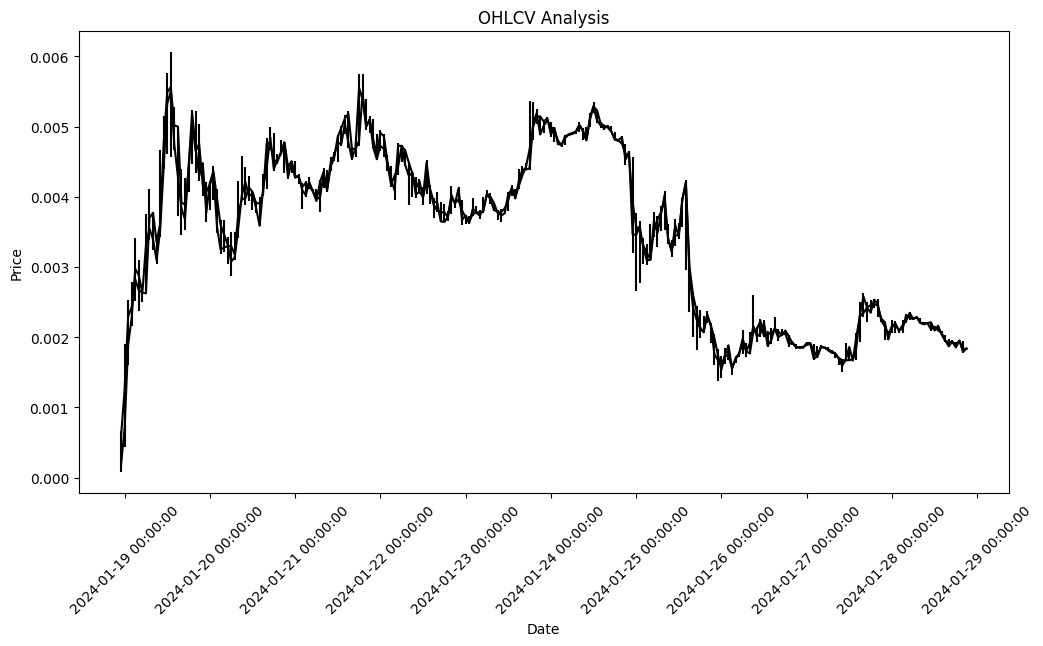

In [12]:
# Extracting OHLCV data
query_result = dakko_client.get_query_results(access_credentials, dakko_sql).resultObj

ohlc_data = [(datetime.fromisoformat(entry['ts'].replace('Z', '+00:00')), 
              entry['open'], entry['high'], entry['low'], entry['close'], entry['volume']) 
             for entry in query_result]

# Plotting the OHLCV chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting candlestick chart
ax.plot_date([x[0] for x in ohlc_data], [x[1] for x in ohlc_data], 'k-')  # Plotting line connecting opens
ax.plot_date([x[0] for x in ohlc_data], [x[4] for x in ohlc_data], 'k-')  # Plotting line connecting closes
ax.vlines([x[0] for x in ohlc_data], [x[2] for x in ohlc_data], [x[3] for x in ohlc_data], colors='k', linestyles='solid')

# Formatting x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.xticks(rotation=45)

# Setting labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('OHLCV Analysis')

plt.show()

#### Create Time series analysis on the closing price 

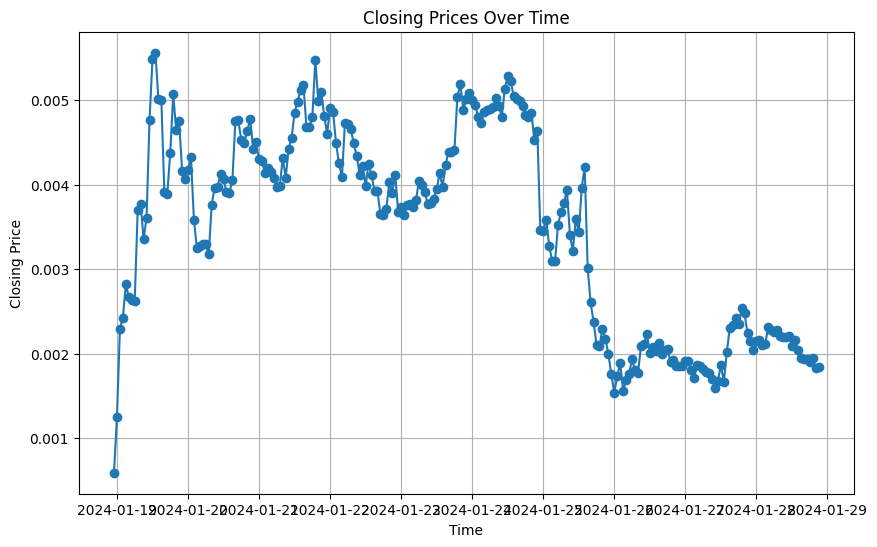

In [13]:
# Create Timeseries analyis on the address close data
timestamps = [datetime.fromisoformat(entry['ts'].replace('Z', '+00:00')) for entry in query_result]
closing_prices = [entry['close'] for entry in query_result]

# Plotting the time series graph
plt.figure(figsize=(10, 6))
plt.plot(timestamps, closing_prices, marker='o', linestyle='-')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

#### Let's now plot sync event data

TypeError: agg function failed [how->mean,dtype->object]

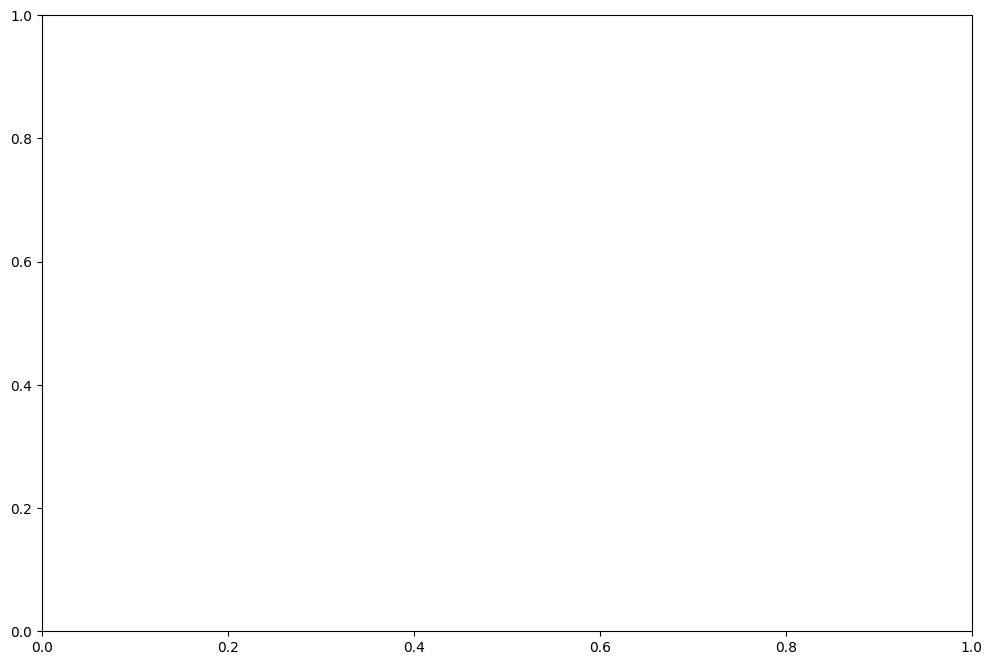

In [14]:
dakko_sync_sql = DakkoSearch(
    query=f"select * from dakko_poc.eth_bronze.parsed_transaction_logs_refine where address = lower('0x704aD8d95C12D7FEA531738faA94402725acB035') and event = 'Sync'"
)

sync_events = dakko_client.get_query_results(access_credentials,dakko_sync_sql).dataframe


def parse_args(df, names: str, args: str):
    # get first row of the column

    unique_names = df[names].unique()
    new_columns = [x.split(",") for x in unique_names]
    new_columns = reduce(lambda x, y: x + y, new_columns)

    df[new_columns] = None

    new_df = pd.DataFrame()

    for combo in unique_names:
        slice_df = df[df[names] == combo].copy()
        slice_df[combo.split(",")] = slice_df[args].str.split(";", expand=True)
        new_df = pd.concat([new_df, slice_df])

    new_df.drop(columns=[args, names], inplace=True)

    return new_df

# assume the data in the "sync_events" variable
sync_events["not_indexed_names"] = "reserve0,reserve1"
sync_events = parse_args(sync_events, "not_indexed_names", "not_indexed_args")
sync_events["timestamp"] = pd.to_datetime(sync_events["timestamp"])

dec0 = 1e18
dec1 = 1e18

sync_events["reserve0"] = sync_events["reserve0"].astype(float) / dec0
sync_events["reserve1"] = sync_events["reserve1"].astype(float) / dec1
sync_events.dropna(inplace=True)
sync_events.sort_values("timestamp", inplace=True)

sync_events["liquidity"] = (
    sync_events["reserve0"] * sync_events["reserve1"] * dec0 * dec1
) ** 0.5


# for sure this one is for showing, but in reality it's easy to catch any significant changes
sync_events["liquidity_diff"] = sync_events["liquidity"].diff()

fig, ax = plt.subplots(figsize=(12, 8))


temp_df = (
    sync_events.set_index("timestamp").resample("1H").mean().fillna(method="ffill")
)

temp_df.plot(y="liquidity", ax=ax)

ax.scatter(
    [sync_events.timestamp[sync_events.liquidity_diff.abs().idxmax()]],
    [sync_events.liquidity[sync_events.liquidity_diff.abs().idxmax()]],
    color="red",
    label="fluctuation",
)

ax.legend()


#### Fetch Wallet Labels for Top wallets

In [16]:
# Search for Wallet labels from Dakko
# dakko_search_wallets_labels = DakkoSearch(
#     query='kucoin'
# )

dakko_search_wallets_labels = DakkoSearch(
    query='binance'
)

# dakko_search_wallets_labels = DakkoSearch(
#     query='bybit'
# )

wallet_labels = dakko_client.get_wallet_labels(
    access_credentials, dakko_search_wallets_labels
).dataframe

print("Search for Top Wallet Labels")
print(wallet_labels)

Search for Top Wallet Labels
                                      address  \
0  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
1  0xf977814e90da44bfa03b6295a0616a897441acec   
2  0x5a52e96bacdabb82fd05763e25335261b270efcb   
3  0x28c6c06298d514db089934071355e5743bf21d60   
4  0x9696f59e4d72e237be84ffd425dcad154bf96976   
5  0x21a31ee1afc51d94c2efccaa2092ad1028285549   
6  0xdfd5293d8e347dfe59e90efd55b2956a1343963d   
7  0x56eddb7aa87536c09ccc2793473599fd21a8b17f   
8  0x4976a4a02f38326660d17bf34b431dc6e2eb2327   
9  0xa344c7ada83113b3b56941f6e85bf2eb425949f3   

                                           labels  
0  [{'label_type': 'binance', 'confidence': 1.0}]  
1  [{'label_type': 'binance', 'confidence': 1.0}]  
2  [{'label_type': 'binance', 'confidence': 1.0}]  
3  [{'label_type': 'binance', 'confidence': 1.0}]  
4  [{'label_type': 'binance', 'confidence': 1.0}]  
5  [{'label_type': 'binance', 'confidence': 1.0}]  
6  [{'label_type': 'binance', 'confidence': 1.0}]  
7  [{'label_typ

In [17]:
# Search for Wallet labels from Dakko Dataframe
dakko_search_wallets_labels = DakkoSearch()

wallet_labels_dataframe = dakko_client.get_wallet_labels(
    access_credentials, dakko_search_wallets_labels
).dataframe

print("Search for Top Wallet Labels Dataframe")
print(wallet_labels_dataframe)

Search for Top Wallet Labels Dataframe
                                      address  \
0  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8   
1  0xf977814e90da44bfa03b6295a0616a897441acec   
2  0x5a52e96bacdabb82fd05763e25335261b270efcb   
3  0x28c6c06298d514db089934071355e5743bf21d60   
4  0x9696f59e4d72e237be84ffd425dcad154bf96976   
5  0x21a31ee1afc51d94c2efccaa2092ad1028285549   
6  0xdfd5293d8e347dfe59e90efd55b2956a1343963d   
7  0x56eddb7aa87536c09ccc2793473599fd21a8b17f   
8  0x4976a4a02f38326660d17bf34b431dc6e2eb2327   
9  0xa344c7ada83113b3b56941f6e85bf2eb425949f3   

                                           labels  
0  [{'label_type': 'binance', 'confidence': 1.0}]  
1  [{'label_type': 'binance', 'confidence': 1.0}]  
2  [{'label_type': 'binance', 'confidence': 1.0}]  
3  [{'label_type': 'binance', 'confidence': 1.0}]  
4  [{'label_type': 'binance', 'confidence': 1.0}]  
5  [{'label_type': 'binance', 'confidence': 1.0}]  
6  [{'label_type': 'binance', 'confidence': 1.0}]  
7  [{